# 1차 시도

ValueError: x and y must have same first dimension, but have shapes (7,) and (6,)

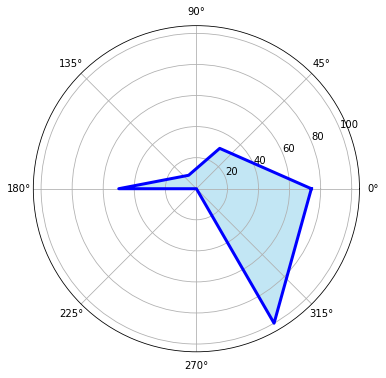

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# 각 영역의 이름과 성취도 점수
areas = ['영역1', '영역2', '영역3', '영역4', '영역5', '영역6']
scores = [82, 60, 50, 70, 45, 95]

# 육각형 꼭지점 좌표
angles = np.linspace(0, 2 * np.pi, len(areas), endpoint=False).tolist()
angles += angles[:1]

# 점수를 0과 100 사이로 정규화
scores += [scores[0]]
scores = [(score - min(scores)) / (max(scores) - min(scores)) * 100 for score in scores]

# 다이어그램 그리기
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'polar': True})
ax.fill(angles, scores, color='skyblue', alpha=0.5)
ax.plot(angles, scores, color='blue', linewidth=3, linestyle='solid')
ax.fill(angles, [100] * len(areas), color='lightgray', alpha=0.5)

# 각 영역의 이름 표시
ax.set_xticks(angles[:-1])
ax.set_xticklabels(areas)

# 점수 범위 표시
ax.set_ylim(0, 100)

# 그리드 라인 표시
ax.grid(True)

# 타이틀 설정
plt.title('영역별 성취도 다이어그램', size=20)

# 다이어그램 출력
plt.show()


- 오류나는데 잘 모르겠음

# 2차 시도 성공

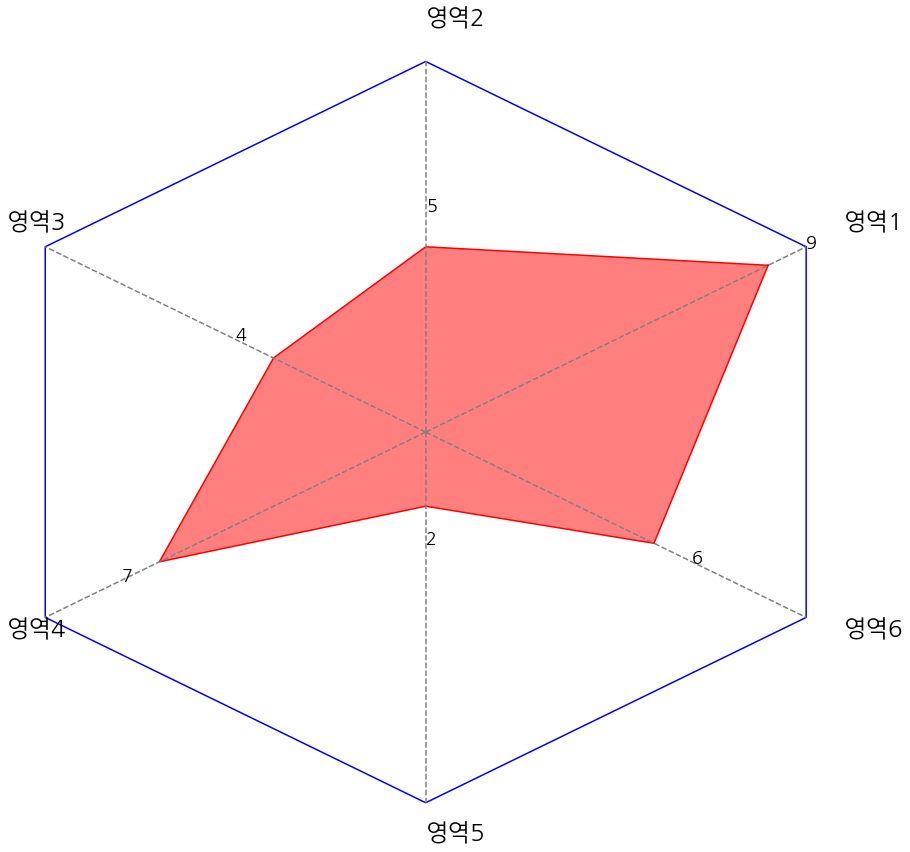

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# 제곱근
def sqrt(inp):
    result = inp/2
    for i in range(30):
        result = (result + (inp / result)) / 2
    return result

# 좌표 계산
# 마지막에는 처음의 좌표를 한번 더 넣어 그림을 그릴때 끝 부분을 이어지게 만들어줌
def honeycomb_list(inp):
    result_x = []
    result_y = []
    for i in range(6):
        theta = (2 * np.pi / 6) * (i + 1) - (2 * np.pi / 6) / 2
        result_x.append(inp[i] * np.cos(theta))
        result_y.append(inp[i] * np.sin(theta))
    theta = (2 * np.pi / 6) * (0 + 1) - (2 * np.pi / 6) / 2
    result_x.append(inp[0] * np.cos(theta))
    result_y.append(inp[0] * np.sin(theta))    
    return result_x, result_y

# 그래프
# 인풋값으로 점수의 최고값과 점수 리스트를 받음
# 각 리스트에 +1 씩 더한 더미 리스트를 만들어 점수 및 문자를 쓰도록 구현

# inp1 : 최고점
# inp2 : 점수 리스트
def honeycomb_graph(inp1, inp2):
    max_list = np.zeros(6) + inp1
    max_x, max_y = honeycomb_list(max_list)
    x, y = honeycomb_list(inp2)
    
    fig, ax = plt.subplots()
    fig.set_size_inches(15, 15)
    fig.patch.set_visible(False)
    ax.axis('off')
    plt.rcParams['font.family'] = 'NanumGothic'
    
    # 바깥쪽 그래프
    plt.plot(max_x, max_y, 'b')
    
    # 안쪽 그래프
    plt.plot(x, y, 'r')
    
    # 색 채우기
    plt.fill_between(x, y, 0, facecolor="red", alpha=0.5)
    
    # 점수쓰기
    score_list = np.array(inp2) + 1
    score_x, score_y = honeycomb_list(score_list)
    
    # 글자쓰기
    text = ['영역1', '영역2', '영역3', '영역4', '영역5', '영역6']
    text_x, text_y = honeycomb_list(max_list + 1)
    
    for i in range(6):
        # 점수
        plt.text(score_x[i], score_y[i], inp2[i], fontsize = 18)
        # 점선
        plt.plot([0, max_x[i]], [0, max_y[i]], linestyle = '--', color = 'gray')
        # 글자
        plt.text(text_x[i], text_y[i], text[i], fontsize = 24)
        
        
data = [9, 5, 4, 7, 2, 6]
honeycomb_graph(10, data)